# Weather Data Analysis

The Weather DataSet is a time-series dataset with per-Hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature,
Relative Humidity, Wind Speed, Visibility, Pressure and Weather Conditions.

Code will be uploaded to Github and interact with the app at Streamlit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [93]:
# load dataset

try:
    w_data = pd.read_csv('1. Weather Data.csv')
    print("Let's go..........")
except:
    print('No such dataset')

Let's go..........


In [3]:
# check first 5 rows
w_data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
# check last 5 rows
w_data.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [5]:
# Check columns -> 

w_data.keys()

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
# check the number of rows and columns in the dataset -> 

w_data.shape

(8784, 8)

In [25]:
# index of data
w_data.index

RangeIndex(start=0, stop=8784, step=1)

In [14]:
# check summary statistics of all numerical columns -> 

w_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [7]:
# More understanding of the dataset -> 

w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
# check datatypes of all the columns -> 

w_data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

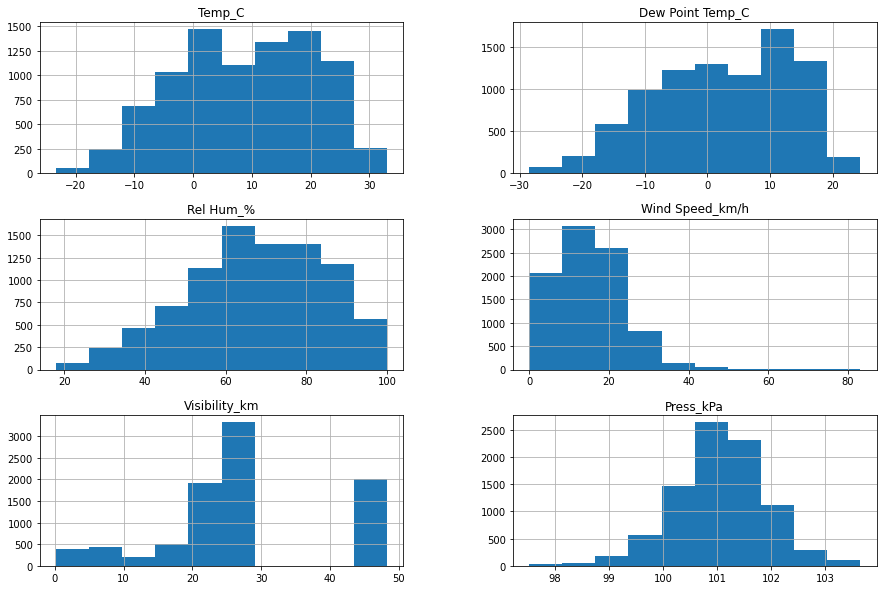

In [10]:
# check hist

w_data.hist(figsize=(15, 10))
plt.show()

In [11]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

w_data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

Text(0.5, 1.0, 'Cardinality')

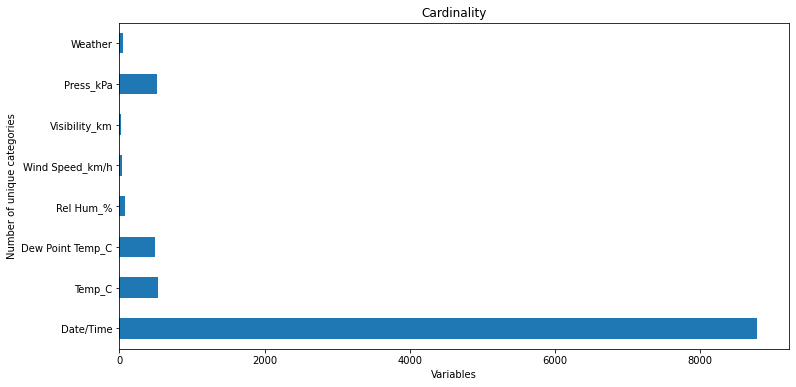

In [12]:
# plot the cardinality:

w_data.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [13]:
# check the count of features/ non-null values in each column -> 


w_data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

# Part 2

# EDA + Cleaning

In [15]:
# Let's replace the empty strings with NaN values

w_data = w_data.replace(' ', np.nan)

In [16]:
# Let's replace the question marks (?) with NaN values

w_data = w_data.replace('?', np.nan)

In [17]:
# Let's replace the question marks (.) with NaN values

w_data = w_data.replace('.', np.nan)

In [18]:
# Let's replace \N (always add an extra forward class)-> (\\N) with NaN values

w_data = w_data.replace('\\N', np.nan)

In [19]:
# check for duplicates
w_data.duplicated().sum().sum()

0

In [20]:
# check for null values

w_data.isna().sum().sum()

0

In [26]:
# sum of unique values in the weather column
w_data.Weather.nunique()

50

In [42]:
# list of all unique values in the weather column
w_data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

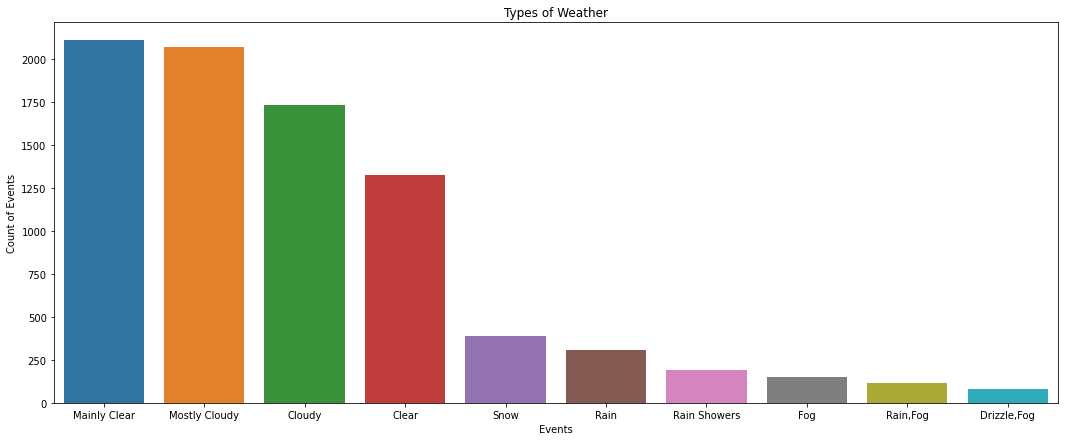

In [47]:
# plot first 10 values of the weather column
plt.figure(figsize=(18,7))
g = sns.countplot(
    x='Weather',
    data=w_data,
    #palette='Blues_r',
    order=w_data['Weather'].value_counts().index[0:10]
)
g.set_xlabel('Events')
g.set_ylabel('Count of Events')
g.set_title('Types of Weather')
plt.show()

In [30]:
# Checking correlation - how features are correlated

w_data.corr(numeric_only=True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


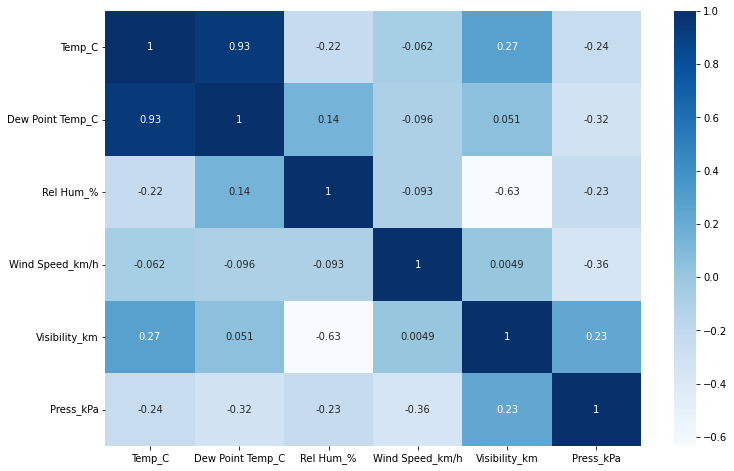

In [34]:
# then plot the correlation of the top most correlated features:
plt.figure(figsize=(12,8))
e = w_data.corr(numeric_only=True)
top_correlated_features = e.index
g = sns.heatmap(w_data[top_correlated_features].corr(), annot=True, cmap='Blues')

# Part 3

# Data Analysis Questions 

`1. Find all unique wind speed values in data`

In [21]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
7030,10/19/2012 22:00,13.4,12.3,93,7,16.1,100.15,Cloudy
7763,11/19/2012 11:00,2.4,-3.4,65,6,24.1,102.83,Mainly Clear


In [48]:
# total of unique values of the Wind Speed_km/h column
w_data['Wind Speed_km/h'].nunique()

34

In [49]:
# list of unique values of the Wind Speed_km/h column
w_data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

=====

`2. Find the number of times when the "weather is exactly clear" `

In [50]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
886,2/6/2012 22:00,2.7,-2.6,68,13,25.0,100.68,Mostly Cloudy
8634,12/25/2012 18:00,-8.9,-13.4,70,13,25.0,102.16,Mainly Clear


In [68]:
# solution 1
w_data[w_data.Weather == 'Clear'].count()

Date/Time           1326
Temp_C              1326
Dew Point Temp_C    1326
Rel Hum_%           1326
Wind Speed_km/h     1326
Visibility_km       1326
Press_kPa           1326
Weather             1326
dtype: int64

In [86]:
# solution 2
gg = w_data.groupby('Weather').get_group('Clear')
gg.count()

Date/Time           1326
Temp_C              1326
Dew Point Temp_C    1326
Rel Hum_%           1326
Wind Speed_km/h     1326
Visibility_km       1326
Press_kPa           1326
Weather             1326
dtype: int64

===========================

`3. Find the number of times when "wind speed was exactly 4km/hr" `

In [79]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8758,12/30/2012 22:00,-13.7,-16.3,81,19,25.0,101.54,Mainly Clear
1229,2/21/2012 5:00,-6.1,-8.6,82,7,25.0,102.05,Mainly Clear


In [89]:
# solution 1
w_data[w_data['Wind Speed_km/h'] == 4].count()

Date/Time           474
Temp_C              474
Dew Point Temp_C    474
Rel Hum_%           474
Wind Speed_km/h     474
Visibility_km       474
Press_kPa           474
Weather             474
dtype: int64

In [87]:
# solution 2
w_data.groupby(['Wind Speed_km/h']).get_group(4).count()

Date/Time           474
Temp_C              474
Dew Point Temp_C    474
Rel Hum_%           474
Wind Speed_km/h     474
Visibility_km       474
Press_kPa           474
Weather             474
dtype: int64

===============

`4. Find out all Null values`

In [88]:
w_data.isna().sum().sum()

0

===============

`5. Rename column "Weather" to "Weather Condition" `

In [90]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
3807,6/7/2012 15:00,22.3,9.3,43,13,48.3,100.80,Mainly Clear
450,1/19/2012 18:00,-5.0,-12.9,54,19,25.0,100.66,Cloudy


In [94]:
w_data.rename(columns={'Weather':'Weather Condition'}, inplace=True)

In [96]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
203,1/9/2012 11:00,-3.7,-7.2,77,7,24.1,101.54,Snow
6240,9/17/2012 0:00,11.5,8.6,82,4,25.0,101.20,Clear


========

`6. What is the mean of "Visibility" `

In [97]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
6462,9/26/2012 6:00,15.0,9.1,68,17,24.1,100.86,Cloudy
2383,4/9/2012 7:00,6.3,1.5,71,13,24.1,99.11,Rain


In [98]:
w_data.Visibility_km.mean()

27.664446721311478

===============

`7. What is the Standard Deviation of "Pressure" in this data`

In [100]:
w_data.sample(n=1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
8115,12/4/2012 3:00,3.8,1.2,83,19,25.0,101.71,Cloudy


In [99]:
w_data.Press_kPa.std()

0.8440047459486483

================

`8. What's the Variance of Relative Humidity`

In [101]:
w_data.sample(n=1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
6889,10/14/2012 1:00,4.6,3.4,92,20,9.7,101.51,"Rain,Fog"


In [102]:
w_data['Rel Hum_%'].var()

286.24855019850196

==================

`9. Find all instances when snow was recorded`

In [103]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
5993,9/6/2012 17:00,26.9,17.6,57,17,24.1,100.36,Mainly Clear
1448,3/1/2012 8:00,-5.0,-7.5,83,32,1.2,100.59,Snow


In [106]:
# solution 2
w_data[w_data['Weather Condition'] == 'Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


================

`10. Find all instances when "Wind Speed is above 24" and "Visibility is 25" `

In [116]:
w_data.sample(n=1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
7447,11/6/2012 7:00,-3.4,-7.0,76,6,48.3,101.86,Mostly Cloudy


In [118]:
w_data[(w_data['Wind Speed_km/h'] > 24) & (w_data['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


===================

`11. What is the mean value of each column against each "weather condition" `

In [119]:
w_data.sample(n=1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
6480,9/27/2012 0:00,10.1,6.0,76,7,25.0,101.51,Mainly Clear


In [120]:
w_data.groupby(['Weather Condition']).mean()

C:\Users\ACT\AppData\Local\Temp\ipykernel_9820\749984715.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  w_data.groupby(['Weather Condition']).mean()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


=============

`12. What is the Maximum and Minimum value of each column against the "Weather Condition" `

In [121]:
w_data.sample(n=1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
2052,3/26/2012 12:00,0.2,-11.4,41,30,48.3,101.28,Mainly Clear


In [123]:
w_data.groupby(['Weather Condition']).max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/19/2012 18:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",12/22/2012 3:00,1.1,0.6,98,32,9.7,100.15
Fog,9/22/2012 0:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2/1/2012 5:00,-2.3,-3.3,93,26,12.9,101.02


In [122]:
w_data.groupby(['Weather Condition']).min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44


==================

`13. Show all Records where Condition is False`

In [124]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
561,1/24/2012 9:00,2.9,-1.8,71,30,24.1,100.60,Cloudy
958,2/9/2012 22:00,0.8,-4.7,67,28,25.0,101.11,Clear


In [125]:
w_data.groupby(['Weather Condition']).get_group('Fog')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


============

`14. Find all instances when "weather" is clear or visibility is above 40`

In [126]:
w_data.sample(n=2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
7926,11/26/2012 6:00,-4.5,-10.9,61,11,25.0,100.77,Cloudy
2111,3/28/2012 23:00,0.8,-1.0,88,17,11.3,99.99,Cloudy


In [127]:
w_data[(w_data['Weather Condition'] == 'Clear') | (w_data['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


=================

`15. Find all instances when Weather Condition is clear and relative humidity > 50` or `visibility > 40`

In [134]:
w_data[((w_data['Weather Condition'] == 'Clear') & (w_data['Rel Hum_%'] > 50)) | (w_data['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


# End of Exercises !!!!!